# Grid Search

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz
from SecurityDataAnalysis import Crowdfunding
from sklearn.model_selection import GridSearchCV


In [3]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0) 

print("Size of training set:", X_train.shape[0])
print("Size of test set:", X_test.shape[0])

best_score = 0 

for depth in range(1, 8): # 1~7
    for leaf in range(2, 8): # 2~7
        tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, random_state=0)
        tree.fit(X_train, y_train)
        score = tree.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'min_samples_leaf': leaf}

print("Best score:", best_score)
print("Best parameters:", best_parameters)

Size of training set: 112
Size of test set: 38
Best score: 0.9736842105263158
Best parameters: {'max_depth': 3, 'min_samples_leaf': 2}


Training set score: 0.98
Test set score: 0.97


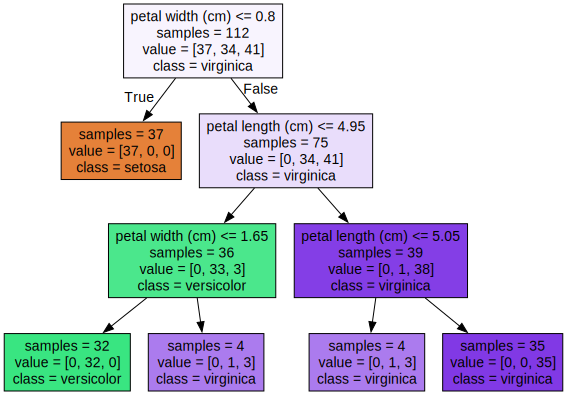

In [6]:
tree = DecisionTreeClassifier(max_depth = best_parameters['max_depth'], 
                              min_samples_leaf = best_parameters['min_samples_leaf'], random_state=0)
tree.fit(X_train, y_train)

print(f"Training set score: {tree.score(X_train, y_train):.2f}")
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

export_graphviz(tree, out_file="output/tree15.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

with open("output/tree15.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=0)

In [8]:
iris = load_iris()

print("Size of training set:", X_train.shape[0])
print("Size of validation set:", X_valid.shape[0])
print("Size of test set:", X_test.shape[0])

best_score = 0 

for depth in range(1, 8):
    for leaf in range(2, 8):
        tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, random_state=0)
        tree.fit(X_train, y_train)
        score = tree.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'min_samples_leaf': leaf}

print("Best score: ", best_score)
print("Best parameters: ", best_parameters)

Size of training set: 84
Size of validation set: 28
Size of test set: 38
Best score:  1.0
Best parameters:  {'max_depth': 3, 'min_samples_leaf': 2}


Training set score: 0.98
Validation set score: 1.00
Test set score: 0.97


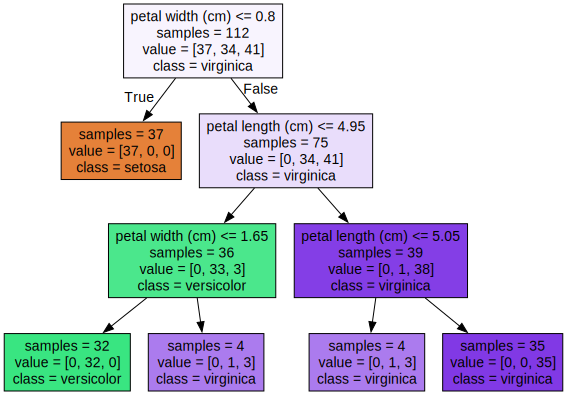

In [9]:
tree = DecisionTreeClassifier(max_depth = best_parameters['max_depth'], 
                              min_samples_leaf = best_parameters['min_samples_leaf'], random_state=0)
tree.fit(X_train_val, y_train_val)

print(f"Training set score: {tree.score(X_train, y_train):.2f}")
print(f"Validation set score: {tree.score(X_valid, y_valid):.2f}")
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

export_graphviz(tree, out_file="output/tree15_1.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

with open("output/tree15_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [11]:
cf = Crowdfunding()
x_df, y = cf.x_df, cf.y

d:\OneDrive - 중앙대학교\CAU\Grade 1 Semester 2\[전선] 보안데이터 분석\Workspace\SecurityDataAnalysis.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._x_df.rename(columns={'보상수': '#ofRewards'}, inplace=True)


In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x_df, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=0)

In [15]:
print("Size of training set:", X_train.shape[0])
print("Size of validation set:", X_valid.shape[0])
print("Size of test set:", X_test.shape[0])

best_score = 0 

for depth in range(1, 8):
    for leaf in range(2, 8):
        tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, random_state=0)
        tree.fit(X_train, y_train)
        score = tree.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'min_samples_leaf': leaf}

print("Best score:", best_score)
print("Best parameters:", best_parameters)

Size of training set: 431
Size of validation set: 144
Size of test set: 192
Best score: 0.9027777777777778
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4}


Training set score: 0.93
Validation set score: 0.93
Test set score: 0.85


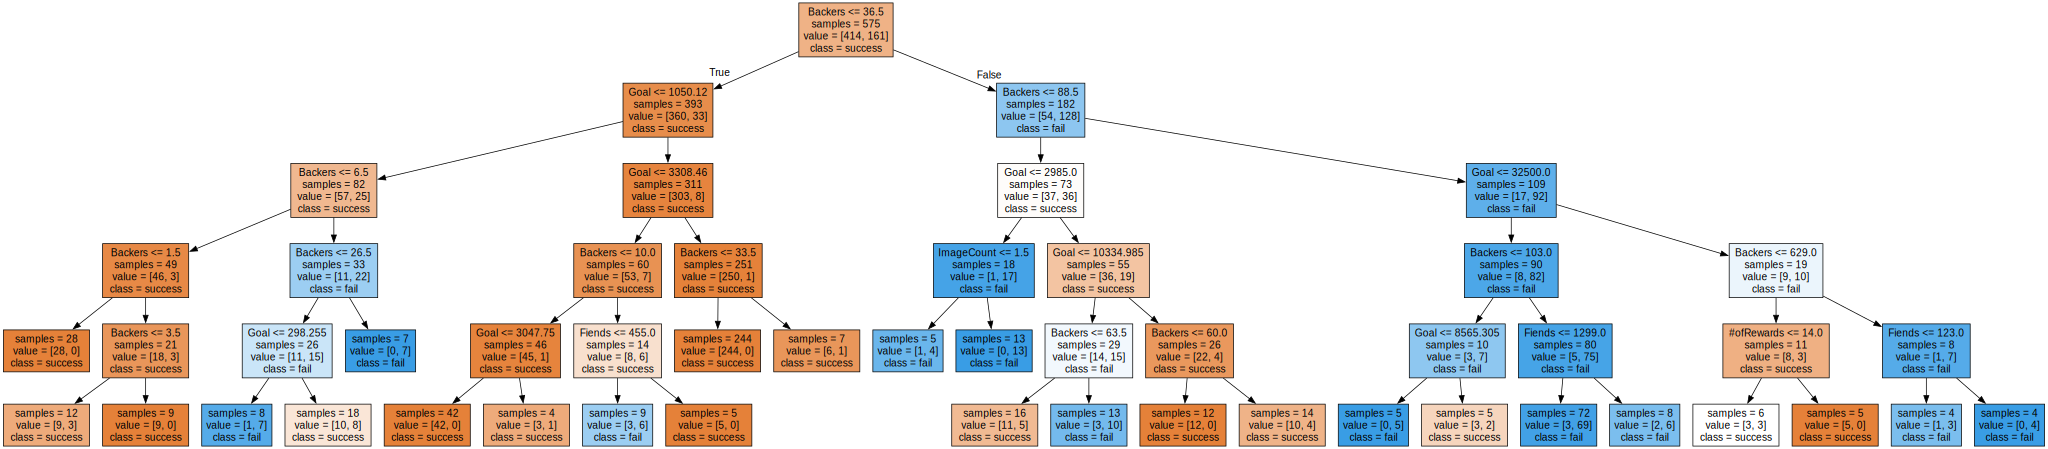

In [17]:
tree = DecisionTreeClassifier(max_depth = best_parameters['max_depth'], 
                              min_samples_leaf = best_parameters['min_samples_leaf'], random_state=0)
tree.fit(X_train_val, y_train_val)

print(f"Training set score: {tree.score(X_train, y_train):.2f}")
print(f"Validation set score: {tree.score(X_valid, y_valid):.2f}")
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

export_graphviz(tree, out_file="output/tree15_3.dot", class_names=['success', 'fail'],
                feature_names=x_df.columns, impurity=False, filled=True)

with open("output/tree15_3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Grid Search

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

param_grid = {'max_depth': [*range(1, 8)],
              'min_samples_leaf': [*range(2, 8)]}
print("parameter_grid:", param_grid, sep='\n')

Test set score: 0.85
parameter_grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7]}


In [26]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Optimal Parameters:", grid_search.best_params_)
print("Best Performance Model:", grid_search.best_estimator_)
print(f"Best Cross Validation Score: {grid_search.best_score_:.2f}")
print(f"Test set score: {grid_search.score(X_test, y_test):.2f}")

Optimal Parameters: {'max_depth': 3, 'min_samples_leaf': 2}
Best Performance Model: DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
Best Cross Validation Score: 0.87
Test set score: 0.87


In [20]:
grid_search?

Type:        GridSearchCV
String form:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
           param_grid={'max_depth': [1,  <...>                    'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
           return_train_score=True)
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\model_selection\_search.py
Docstring:  
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs t

In [27]:
pd.set_option('display.max_columns', None)
df_results = pd.DataFrame(grid_search.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001800,0.000400,0.001402,0.000489,1,2,"{'max_depth': 1, 'min_samples_leaf': 2}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
1,0.001600,0.000491,0.001325,0.000385,1,3,"{'max_depth': 1, 'min_samples_leaf': 3}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
2,0.001999,0.000894,0.001601,0.000490,1,4,"{'max_depth': 1, 'min_samples_leaf': 4}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
3,0.002398,0.001020,0.002000,0.000633,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
4,0.002002,0.000010,0.001437,0.000535,1,6,"{'max_depth': 1, 'min_samples_leaf': 6}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
5,0.001394,0.000487,0.000800,0.000400,1,7,"{'max_depth': 1, 'min_samples_leaf': 7}",0.817391,0.904348,0.843478,0.843478,0.791304,0.840000,0.037543,37,0.856522,0.834783,0.863043,0.841304,0.854348,0.850000,0.010380
6,0.001203,0.000398,0.001200,0.000400,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.826087,0.869565,0.843478,0.834783,0.834783,0.841739,0.014961,31,0.860870,0.845652,0.863043,0.854348,0.865217,0.857826,0.007091
7,0.001601,0.000481,0.000990,0.000012,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.826087,0.869565,0.843478,0.834783,0.834783,0.841739,0.014961,31,0.860870,0.845652,0.863043,0.854348,0.865217,0.857826,0.007091
8,0.001400,0.000489,0.001400,0.000490,2,4,"{'max_depth': 2, 'min_samples_leaf': 4}",0.826087,0.869565,0.843478,0.834783,0.834783,0.841739,0.014961,31,0.860870,0.845652,0.863043,0.854348,0.865217,0.857826,0.007091
9,0.001600,0.000490,0.001200,0.000400,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.826087,0.869565,0.843478,0.834783,0.834783,0.841739,0.014961,31,0.860870,0.845652,0.863043,0.854348,0.865217,0.857826,0.007091


In [28]:
df_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

## GridSearchCV w/ Eval Materix

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, random_state=0)

param_grid = {'max_depth': [*range(1, 8)],
              'min_samples_leaf': [*range(2, 8)]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring="roc_auc", cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print(f"Best Cross Validation Score(average roc_auc): {grid_search.best_score_:.3f}")

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring="accuracy", cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print(f"Best Cross Validation Score(average accuracy): {grid_search.best_score_:.3f}")


Best parameters: {'max_depth': 3, 'min_samples_leaf': 7}
Best Cross Validation Score(average roc_auc): 0.928
Best parameters: {'max_depth': 3, 'min_samples_leaf': 2}
Best Cross Validation Score(average accuracy): 0.875
